# Load Data

In [4]:
# ● Endereço IP do Servidor: 34.55.27.249
# ● Porta: 5432
# ● Nome do Banco de Dados: hackday-bookstore-cds
# ● Usuário: alunocds
# ● Senha: hackday2025

In [5]:
# import psycopg2
# import csv

# # Informações do banco de dados
# host = "34.55.27.249"
# port = "5432"
# dbname = "hackday-bookstore-cds"
# user = "alunocds"
# password = "hackday2025"

# try:
#     # Conexão com o banco de dados
#     conn = psycopg2.connect(
#         host=host,
#         port=port,
#         dbname=dbname,
#         user=user,
#         password=password
#     )
#     print("Conexão com o banco de dados bem-sucedida!")

#     # Criar um cursor para executar as consultas
#     cursor = conn.cursor()

#     # Obter todas as tabelas no banco de dados
#     cursor.execute("""
#         SELECT table_name
#         FROM information_schema.tables
#         WHERE table_schema = 'public';
#     """)
#     tables = cursor.fetchall()

#     # Coletar dados de todas as tabelas e salvar em arquivos CSV
#     for table in tables:
#         table_name = table[0]
#         print(f"\nColetando dados da tabela: {table_name}")

#         # Coletar todos os dados da tabela
#         cursor.execute(f"SELECT * FROM {table_name};")
#         rows = cursor.fetchall()

#         # Obter nomes das colunas
#         col_names = [desc[0] for desc in cursor.description]

#         # Salvar os dados em um arquivo CSV
#         with open(f"{table_name}.csv", "w", newline="", encoding="utf-8") as csv_file:
#             writer = csv.writer(csv_file)
#             writer.writerow(col_names)  # Escrever os nomes das colunas
#             writer.writerows(rows)  # Escrever os dados

#         print(f"Dados da tabela {table_name} salvos em {table_name}.csv")

#     # Fechar o cursor e a conexão
#     cursor.close()
#     conn.close()

# except Exception as e:
#     print(f"Erro ao conectar ao banco de dados: {e}")


In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

autor = pd.read_csv('data/author.csv')
book = pd.read_csv('data/book.csv')
edition = pd.read_csv('data/edition.csv')
award = pd.read_csv('data/award.csv')
format = pd.read_csv('data/format.csv')
genders = pd.read_csv('data/genders.csv')
info = pd.read_csv('data/info.csv')
publisher = pd.read_csv('data/publisher.csv')
ratings = pd.read_csv('data/ratings.csv')
sales = pd.read_csv('data/sales.csv')
series= pd.read_csv('data/series.csv')

# Merge dataframes and clean data

In [88]:
book_rating_price = pd.merge(book,ratings[['book_id','rating']], how='inner', on='book_id')
book_rating_price = pd.merge(book_rating_price,edition, how='inner', on='book_id')
book_rating_price = pd.merge(book_rating_price,format, how='inner', on='format_id')
book_rating_price = pd.merge(book_rating_price,info[['genre_id','book_id']], how='inner', on='book_id')
book_rating_price = pd.merge(book_rating_price,genders, how='inner', on='genre_id')


book_rating_price['publication_date'] = pd.to_datetime(book_rating_price['publication_date'], format='%d/%m/%Y')
book_rating_price = book_rating_price.drop(columns=['book_id', 'author_id','isbn','format_id','genre_id',  'pub_id','print_run_size_k'], axis=1)
book_rating_price.to_csv('book_rating_price.csv')
book_rating_price


,title,rating,publication_date,pages,price,format_desc,genre_desc
0,Alanna Saves the Day,5,2185-09-22,188,8.99,Trade paperback,Childrens
1,Alanna Saves the Day,3,2185-09-22,188,8.99,Trade paperback,Childrens
2,Alanna Saves the Day,3,2185-09-22,188,8.99,Trade paperback,Childrens
3,Alanna Saves the Day,4,2185-09-22,188,8.99,Trade paperback,Childrens
4,Alanna Saves the Day,2,2185-09-22,188,8.99,Trade paperback,Childrens
...,...,...,...,...,...,...,...
84893,Zero over Twelve,3,2187-11-20,338,8.99,Mass market paperback,Mystery
84894,Zero over Twelve,4,2186-12-12,356,20.99,Hardcover,Mystery
84895,Zero over Twelve,4,2187-11-20,338,8.99,Mass market paperback,Mystery
84896,Zero over Twelve,3,2186-12-12,356,20.99,Hardcover,Mystery


In [67]:
book_gender = pd.merge(book,       info,    how='inner', on='book_id')
book_gender = pd.merge(book_gender,genders, how='inner', on='genre_id')
book_gender = pd.merge(book_gender,autor,   how='inner', on='author_id')
book_gender = pd.merge(book_gender,edition, how='inner', on='book_id')


df_split = sales["sale_date"].str.split(",", expand=True)
df_split.columns = ['sale_date','isbn',	1,2,'item_id','order_id']

df_split['discount'] = (df_split[1] +'.'+ df_split[2]).str.replace('"', '', regex=False).astype(float)

df_split = df_split.drop(columns=[1,2])
for col in df_split.columns:
    sales[col] = df_split[col].combine_first(sales[col])

book_gender = pd.merge(book_gender,sales,   how='inner', on='isbn')
book_gender['discount'] = book_gender['discount'].replace(['NaN'], np.nan)

book_gender = book_gender.drop(['book_id','format_id','author_id','genre_id','series_id','isbn','pub_id', 'volume_number','item_id'],axis=1)

# transform to date
book_gender['birthday'] = pd.to_datetime(book_gender['birthday'], format='%d/%m/%Y')
book_gender['publication_date'] = pd.to_datetime(book_gender['publication_date'], format='%d/%m/%Y')
book_gender['sale_date'] = pd.to_datetime(book_gender['sale_date'], format='%d/%m/%Y')

book_gender.to_csv('df.csv')
book_gender

,title,genre_desc,first_name,last_name,birthday,country_residence,hrs_writing_day,publication_date,pages,print_run_size_k,price,sale_date,discount,order_id
0,Alanna Saves the Day,Childrens,Bernard,Hopf,2122-11-27,United States,1.0,2185-09-22,188,10,8.99,2193-01-02,NaN,107020-2
1,Alanna Saves the Day,Childrens,Bernard,Hopf,2122-11-27,United States,1.0,2185-09-22,188,10,8.99,2193-01-02,NaN,107020-4
2,Alanna Saves the Day,Childrens,Bernard,Hopf,2122-11-27,United States,1.0,2185-09-22,188,10,8.99,2193-01-02,NaN,107020-43
3,Alanna Saves the Day,Childrens,Bernard,Hopf,2122-11-27,United States,1.0,2185-09-22,188,10,8.99,2193-01-02,NaN,107020-44
4,Alanna Saves the Day,Childrens,Bernard,Hopf,2122-11-27,United States,1.0,2185-09-22,188,10,8.99,2193-01-02,NaN,107020-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56345,Zero over Twelve,Mystery,Burton,Malamud,2145-01-18,Brazil,6.0,2187-11-20,338,26,8.99,2193-12-29,NaN,107381-49614
56346,Zero over Twelve,Mystery,Burton,Malamud,2145-01-18,Brazil,6.0,2187-11-20,338,26,8.99,2193-12-30,NaN,107382-49692
56347,Zero over Twelve,Mystery,Burton,Malamud,2145-01-18,Brazil,6.0,2187-11-20,338,26,8.99,2193-12-30,NaN,107382-49693
56348,Zero over Twelve,Mystery,Burton,Malamud,2145-01-18,Brazil,6.0,2187-11-20,338,26,8.99,2193-12-30,NaN,107382-49694


# Análise de Dados

In [38]:
df = book_gender.copy()

### Vendas mensais

Text(0.5, 1.0, 'Valor de Vendas Totais ao Mês ')

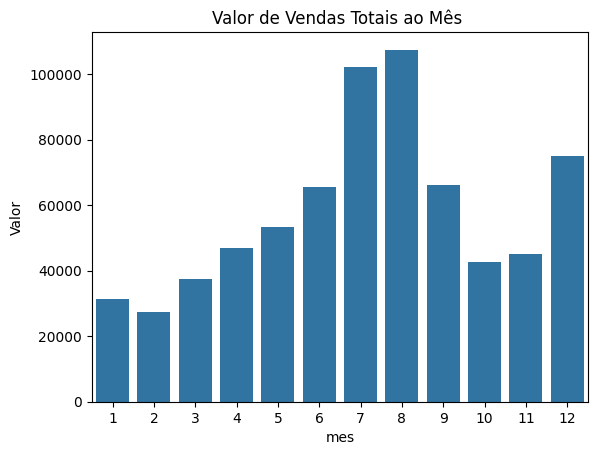

In [52]:
df['mes'] = df['sale_date'].dt.month
sales_month = df.groupby(['mes'])['price'].sum()
sns.barplot(sales_month)
plt.ylabel('Valor')
plt.title('Valor de Vendas Totais ao Mês ')

### Vendas por Gênero

<Axes: xlabel='genre_desc', ylabel='Count'>

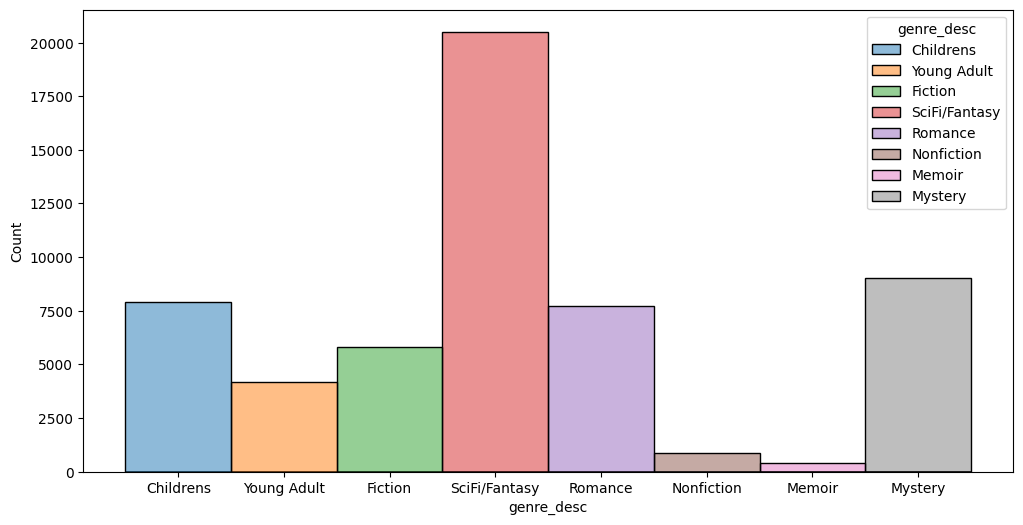

In [14]:
plt.figure(figsize=(12,6))
sns.histplot(data = df, x='genre_desc', hue='genre_desc')

### Vendas por tamanho de livro durante o ano

/tmp/ipykernel_51785/2894567042.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Tamanho do Livro', loc='center left', bbox_to_anchor=(1, 0.5))


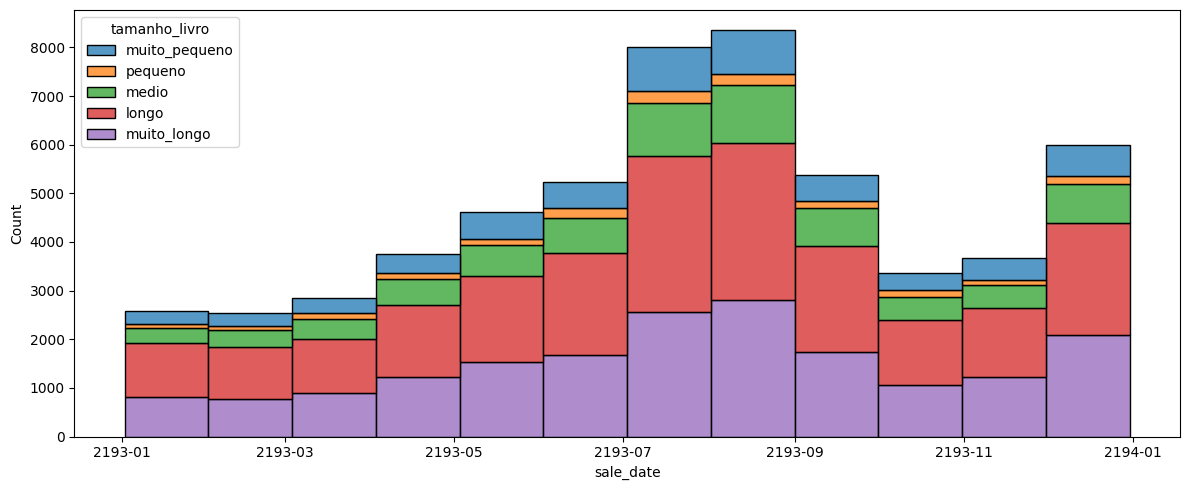

In [137]:
plt.figure(figsize=(12,5))
aux = df.reset_index()
aux['mes'] = aux['sale_date'].dt.month
aux['tamanho_livro'] = pd.cut(aux['pages'], bins=[0, 75, 150, 300, 500, np.inf],
                               labels=['muito_pequeno','pequeno','medio','longo','muito_longo'])

plt.legend(title='Tamanho do Livro', loc='center left', bbox_to_anchor=(1, 0.5))
sns.histplot(data = aux, x='sale_date',hue='tamanho_livro',  multiple="stack",bins=12)
plt.tight_layout()



### Valor Total de Desconto Dado para Cada Gênero de Livro

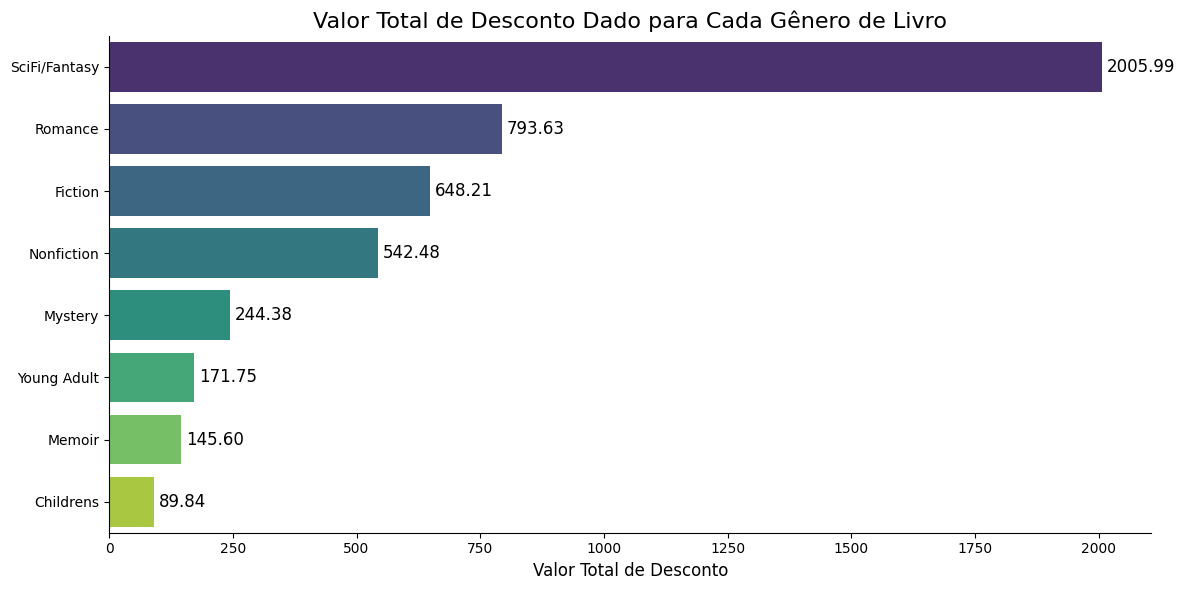

In [134]:
# Calcular o valor de desconto
aux['valor_desconto'] = aux['price'] * aux['discount']

# Agrupar por gênero e somar o valor total de desconto
desconto_por_genero_total = aux.groupby('genre_desc')['valor_desconto'].sum().reset_index()

# Ordenar por valor de desconto
desconto_por_genero_total = desconto_por_genero_total.sort_values(by='valor_desconto', ascending=False)

# Criando o gráfico de barras
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=desconto_por_genero_total, x='valor_desconto', y='genre_desc', hue='genre_desc', palette='viridis')

# Adicionando os valores a frente das barras
for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}', 
                (p.get_width() + 10, p.get_y() + p.get_height() / 2), 
                va='center', ha='left', fontsize=12)

# Adicionando título e rótulos
plt.title('Valor Total de Desconto Dado para Cada Gênero de Livro', fontsize=16)
plt.xlabel('Valor Total de Desconto', fontsize=12)
plt.ylabel('', fontsize=12)

# Removendo bordas e eixos extras
sns.despine(top=True, right=True)  # Remove o eixo superior e lateral direito
ax.spines['top'].set_visible(False)  # Remove a borda superior
ax.spines['right'].set_visible(False)  # Remove a borda direita

# Exibindo o gráfico
plt.tight_layout()
plt.show()


## Livros por Avaliação

In [89]:
df1 = book_rating_price.copy()

/tmp/ipykernel_61808/1914533115.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="rating", data=df, palette="coolwarm")


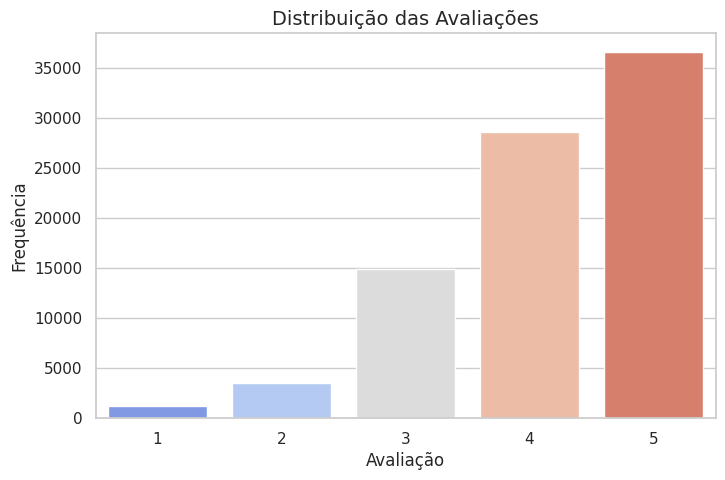

/tmp/ipykernel_61808/1914533115.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="price", y="rating", data=df, palette="pastel")


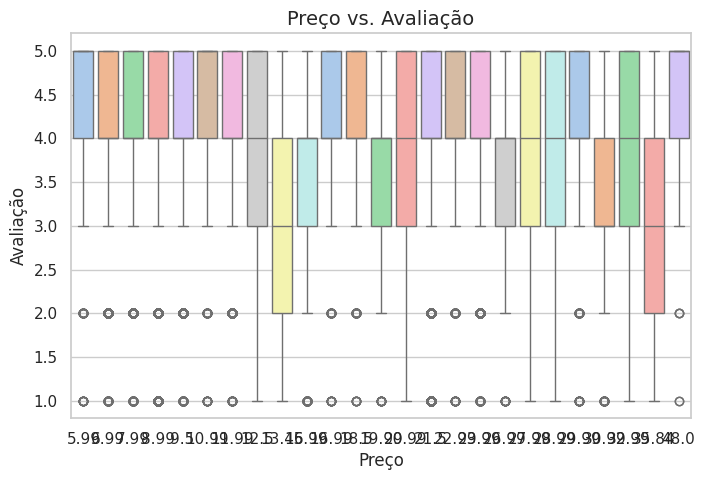

/tmp/ipykernel_61808/1914533115.py:31: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="format_desc", y="rating", data=df, ci=None, palette="viridis")
/tmp/ipykernel_61808/1914533115.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="format_desc", y="rating", data=df, ci=None, palette="viridis")


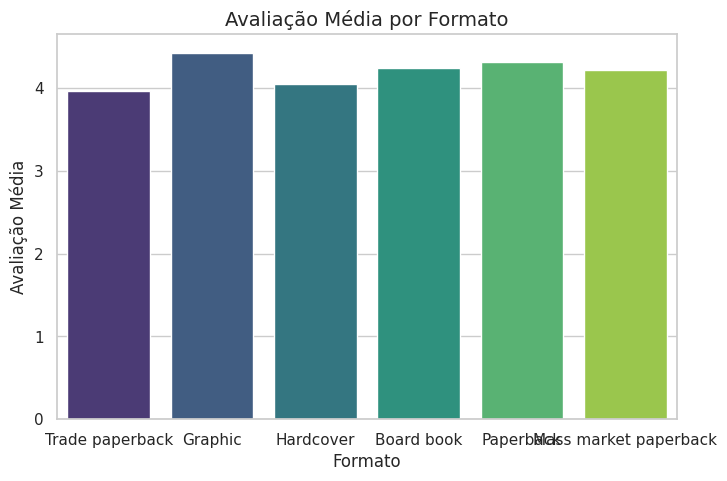

/tmp/ipykernel_61808/1914533115.py:39: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="genre_desc", y="rating", data=df, ci=None, palette="plasma")
/tmp/ipykernel_61808/1914533115.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="genre_desc", y="rating", data=df, ci=None, palette="plasma")


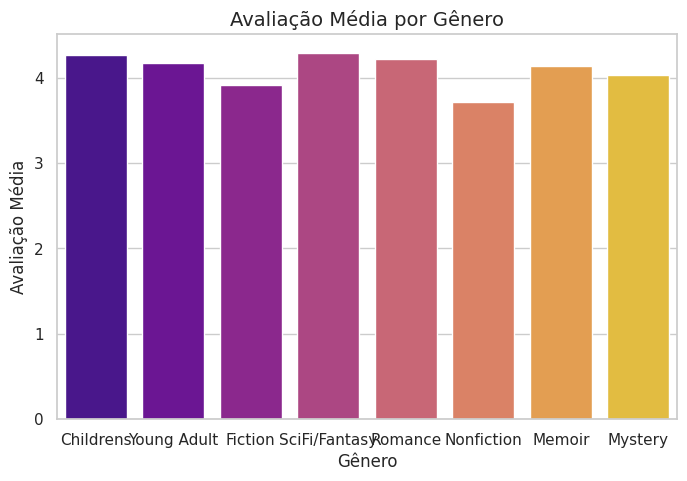

In [90]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Criar DataFrame
df = df1

# Configuração de estilo
sns.set_theme(style="whitegrid", palette="muted")

# 1. **Distribuição de Avaliações**
plt.figure(figsize=(8, 5))
sns.countplot(x="rating", data=df, palette="coolwarm")
plt.title("Distribuição das Avaliações", fontsize=14)
plt.xlabel("Avaliação", fontsize=12)
plt.ylabel("Frequência", fontsize=12)
plt.show()

# 2. **Preço vs. Avaliação**
plt.figure(figsize=(8, 5))
sns.boxplot(x="price", y="rating", data=df, palette="pastel")
plt.title("Preço vs. Avaliação", fontsize=14)
plt.xlabel("Preço", fontsize=12)
plt.ylabel("Avaliação", fontsize=12)
plt.show()

# 3. **Avaliações por Formato**
plt.figure(figsize=(8, 5))
sns.barplot(x="format_desc", y="rating", data=df, ci=None, palette="viridis")
plt.title("Avaliação Média por Formato", fontsize=14)
plt.xlabel("Formato", fontsize=12)
plt.ylabel("Avaliação Média", fontsize=12)
plt.show()

# 4. **Avaliações por Gênero**
plt.figure(figsize=(8, 5))
sns.barplot(x="genre_desc", y="rating", data=df, ci=None, palette="plasma")
plt.title("Avaliação Média por Gênero", fontsize=14)
plt.xlabel("Gênero", fontsize=12)
plt.ylabel("Avaliação Média", fontsize=12)
plt.show()
